# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [96]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

150 observations
4 features  (found using iris_df.info() printed below)

In [162]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

print(iris_df.info())

# Display first few rows of the DataFrame
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


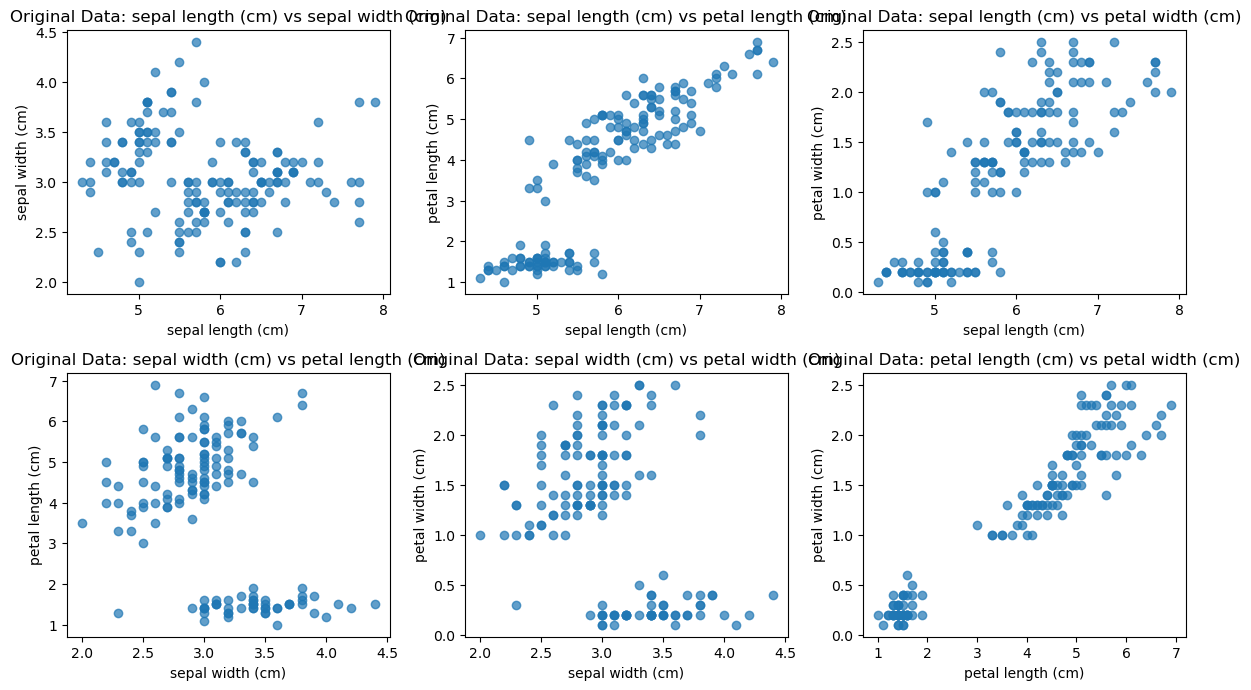

In [163]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

- There is not a clear relationship between 'sepal width' and 'sepal length'.

- 'Petal length' and 'petal width' have a strong direct correlation: as one increases, the other increases.
   There are two clusters visible here:  large petals and small petals. 

- 'Sepal length' generally has a direct correlation to 'petal length' and 'petal width'.
   There appear to be two clusters of flowers: (1) small petals with mostly larger sepal width
                                              (2) large petals with mostly smaller sepal width

- 'Sepal width" generally has an indirect correlation with 'petal length' and 'petal width'
   There are two clusters visible here: (3) large petals with mostly smaller 'sepal width'
                                        (4) small petals with mostly larger 'sepal width'

The analysis above, puts the flowers into two general cateories those with small petals, and those with large petals. These categories can possibly be further refined, as defined by the clusters defined in (1)-(4). However the relationships defined in (1)-(4) were not as strong. 

Theses categories may relate to the distinctions between different species. For example there may be a species that has large petals, and another that has small petals.

#### **Question 3:** 
#### Data cleaning

In [100]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

It is important to scale the data, so that one feature does not dominate the results. Using unstandzrdized data could skew our results. Petal length seems to be naturally longer than sepal length, however this feature should not weigh more heavily in our calculations. Both features are equally important, so we standardize these values so that they are equally weighed in our calculations.  In standardizing the data we preserve the relationships between the features. Using unstandzrdized data could skew our results.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

c:\Users\njay1\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


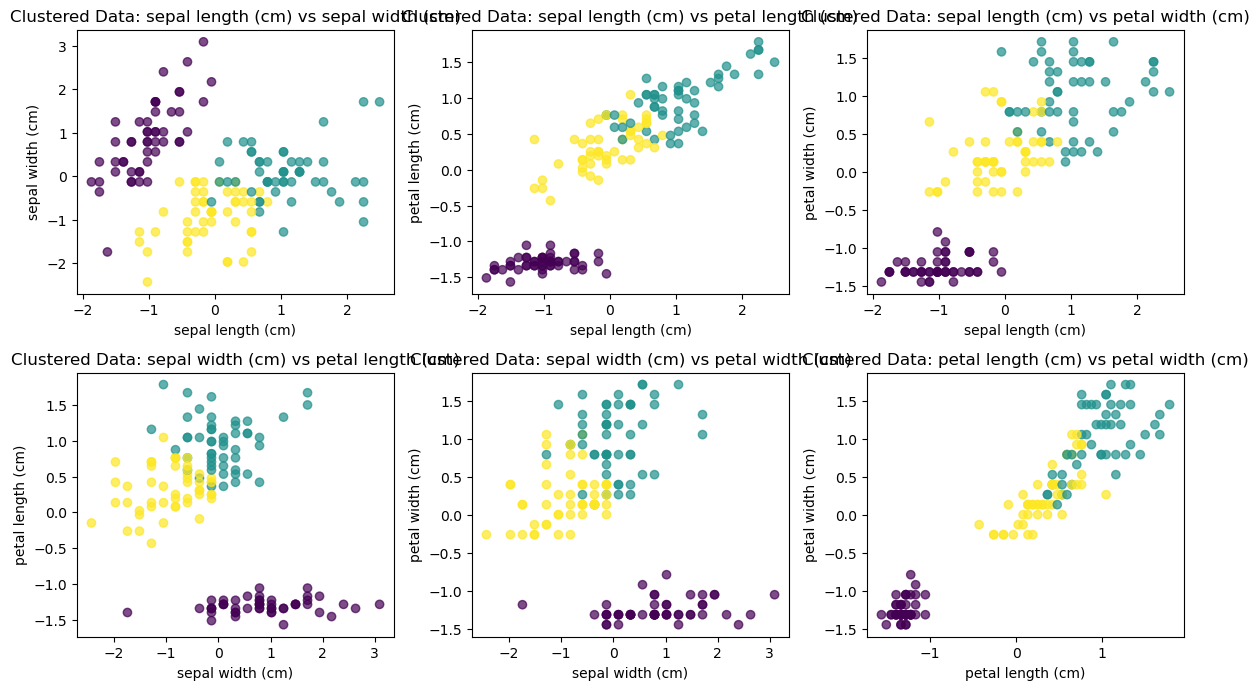

In [164]:
kmeans = KMeans(n_clusters=3)

clusters= kmeans.fit(scaled_iris_df)

clustered_iris_data = scaled_iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].copy()

clustered_iris_data['Cluster'] = clusters.labels_

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

We can use the elbow method. We plot the values for k against the associated WSSDs (the sum of the squares of the distances between the mean of each cluster and all points in the cluster, for each cluster in the model for a given k value). The WSSD measures the spread of the clusters. If the spreads are too large, then the clusters lose their signifigance. Similarly if the spread is too small then the clusters also lose any meaning (for instance when 'k = size of data set', the clusters would each be one point and have a WSSD of 0).

We look for the point on the graph where the value of WSSD is no longer decreasing significantly, such that if we chose a higher k, our WSSD does not decrease by much. In this way we try to find the lowest k, such that we have a relatively low WSSD. This means the spread of our clusters are relatively small, and if we choose a higher k, the spread will not decrease by much. Visually, we look for a point in the grpah where the slope suddendly changes, and the line becomes flatter. 

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [165]:
mean_petal_width = iris_df['petal width (cm)'].mean()

np.random.seed(12345)

one_sample = iris_df.sample(n=40)

bootstrap_samples = []

for i in range(10000):
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample
    
# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)



# Calculate the mean price for each bootstrap sample (replicate)
boot_means = boot10000.groupby("replicate")['petal width (cm)'].mean().reset_index(name='mean petal width')

# Calculate the 90% confidence interval bounds 5th and 95th percentiles) for the mean petal width
ci_bounds = boot_means["mean petal width"].quantile([0.05, 0.95])

lower_bound = ci_bounds[0.05]
upper_bound = ci_bounds[0.95]

# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 1.1993333333333336
90% Confidence Interval of Mean Petal Width: (0.9425000000000001, 1.33)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

We use bootsraspping here to estimate our confidence level in the variablility of our data compared to that of the whole population. We want to estimate how well our mean petal width represents the mean petal width of the whole population. 

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

Calculating the confidence interval from the boostrap samples tells us how accuratetely the mean petal width from our data possibly represents the mean petal width of the entire population. It shows how far off our mean may be from the true mean of the iris population. Our confidence interval tells us that we can estimate with 90% confidence that the true mean petal width for the iris population is between 0.942cm and 1.33cm.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

The values for 'mean petal width (cm)' of our bootstrap samples vary from 0.735cm to 1.5675cm (an interval of 0.83cm).  From our bootstrapping calculations we can estimate with 90% confidence that the true mean of the whole iris population lies between 0.942cm and 1.33cm (an interval of length 0.388cm). This interval is relatively small (47% of the original spread of the 'mean petal width' values), so gives us a good estimate of the possible range in which the true mean lies. Using the bootstrapping method we have narrowed the range of the bootstrap sample means by almost half. The mean petal width of our data is 1.19cm. which lies near the center of this interval (the center is at 1.15cm). The histogram of the sample means resembles a normal distribution. Hence, the estimtate we found using bootstrapping seems to be a relatively stable and reliable estimate. 

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
